# Linear Regression Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2012-01-01'
end = '2021-07-16'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,5.53,5.59,5.44,5.48,5.48,12675100
2012-01-04,5.47,5.49,5.41,5.46,5.46,8034900
2012-01-05,5.45,5.57,5.35,5.46,5.46,11476900
2012-01-06,5.44,5.52,5.39,5.43,5.43,12938600
2012-01-09,5.42,5.60,5.38,5.59,5.59,12585400


In [3]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-09,90.040001,91.260002,88.529999,90.900002,90.900002,35256400
2021-07-12,91.220001,91.900002,89.650002,90.809998,90.809998,28526600
2021-07-13,90.480003,91.410004,89.830002,90.260002,90.260002,30367600
2021-07-14,90.760002,91.400002,88.940002,89.050003,89.050003,28108500
2021-07-15,89.779999,89.779999,86.180000,86.930000,86.930000,38944700


In [4]:
y = dataset['Adj Close']
X = dataset.drop('Adj Close',axis=1)

In [5]:
dataset.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
print(len(X))
print(len(y))

2399
2399


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix,accuracy_score

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
X_test.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train,y_train)

LinearRegression()

In [12]:
y_predict = model.predict(X_test)

In [13]:
rmse = mean_squared_error(y_test,y_predict)

In [14]:
r2 = r2_score(y_test,y_predict)

In [15]:
coefficient = model.coef_

In [16]:
intercept = model.intercept_

In [17]:
print('rmse=',rmse)
print('r2=',r2)
print('coefficient=',coefficient)
print('intercept=',intercept)

rmse= 2.3990246245440438e-20
r2= 1.0
coefficient= [ 1.60684683e-14 -2.09032320e-14  6.45546616e-15  1.00000000e+00
 -4.16274342e-18]
intercept= 1.8123103018297115e-10


In [18]:
p ={'y_test':y_test,'y_predict':y_predict}


In [19]:
df = pd.DataFrame(data=p)

<AxesSubplot:ylabel='Date'>

<Figure size 1440x576 with 0 Axes>

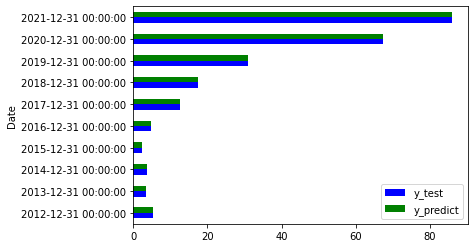

In [20]:
plt.figure(figsize=(20,8))
df.resample('Y').mean().plot.barh(color=['blue','green'])

In [21]:
r2_score = model.score(X_test,y_test) 
print(r2_score*100,'%')

100.0 %
